Importing Libraries and Dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import  RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Data Acquisition

In [2]:
bank_df = pd.read_csv('Churn_Modelling.csv', index_col=0)
pd.options.display.float_format = '{:,.2f}'.format
bank_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,"101,348.88",1
2,15647311,Hill,608,Spain,Female,41,1,"83,807.86",1,0,1,"112,542.58",0
3,15619304,Onio,502,France,Female,42,8,"159,660.80",3,1,0,"113,931.57",1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,"93,826.63",0
5,15737888,Mitchell,850,Spain,Female,43,2,"125,510.82",1,1,1,"79,084.10",0


In [3]:
# Inspecting the data types
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
# Checking for missing values
bank_df.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
# Insights on the statistics of the data set
bank_df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerId,"10,000.00","15,690,940.57","71,936.19","15,565,701.00","15,628,528.25","15,690,738.00","15,753,233.75","15,815,690.00"
CreditScore,"10,000.00",650.53,96.65,350.00,584.00,652.00,718.00,850.00
Age,"10,000.00",38.92,10.49,18.00,32.00,37.00,44.00,92.00
Tenure,"10,000.00",5.01,2.89,0.00,3.00,5.00,7.00,10.00
Balance,"10,000.00","76,485.89","62,397.41",0.00,0.00,"97,198.54","127,644.24","250,898.09"
NumOfProducts,"10,000.00",1.53,0.58,1.00,1.00,1.00,2.00,4.00
HasCrCard,"10,000.00",0.71,0.46,0.00,0.00,1.00,1.00,1.00
IsActiveMember,"10,000.00",0.52,0.50,0.00,0.00,1.00,1.00,1.00
EstimatedSalary,"10,000.00","100,090.24","57,510.49",11.58,"51,002.11","100,193.91","149,388.25","199,992.48"
Exited,"10,000.00",0.20,0.40,0.00,0.00,0.00,0.00,1.00


Data Visualization

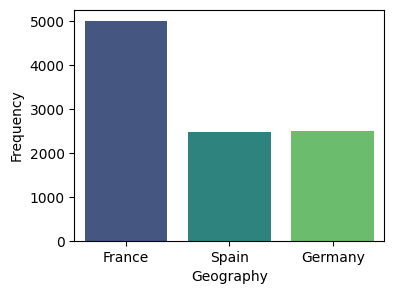

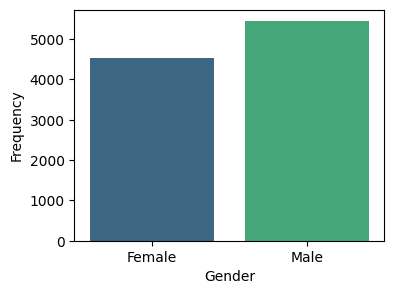

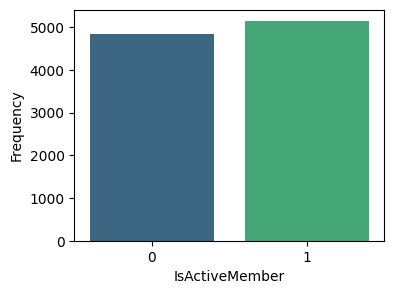

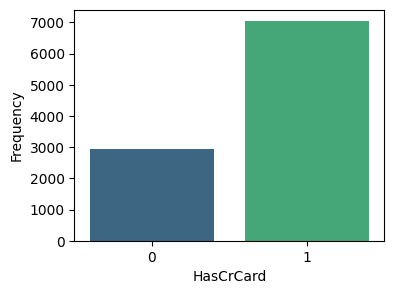

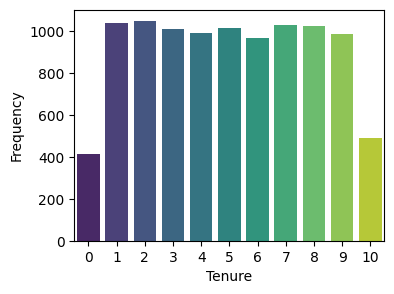

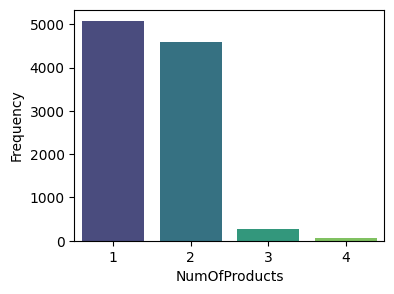

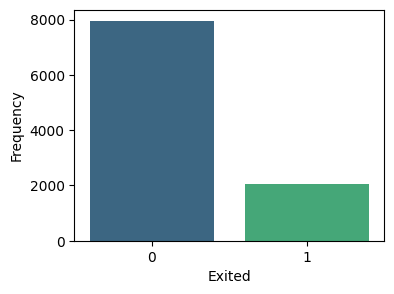

In [7]:
# Data distribution of categorical variables
categories = ['Geography', 'Gender', 'IsActiveMember', 'HasCrCard', 'Tenure', 'NumOfProducts', 'Exited']

for category in categories:
    fig, ax = plt.subplots(1, 1, figsize=(4,3))
    sns.countplot(x=category, data=bank_df, palette='viridis')
    ax.set_ylabel('Frequency')

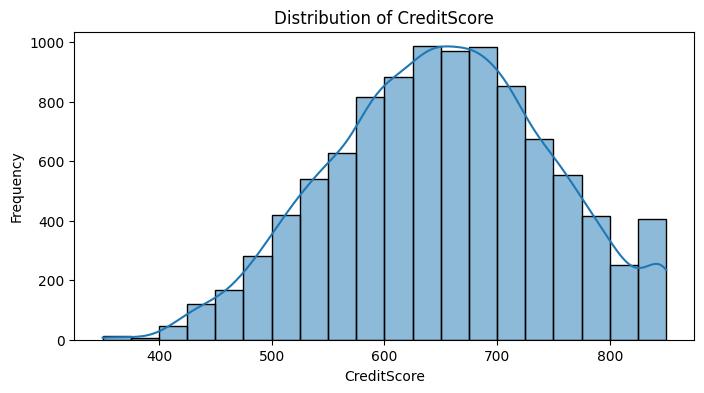

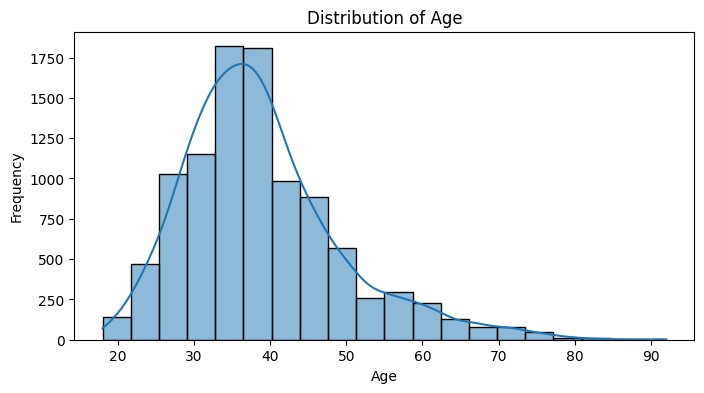

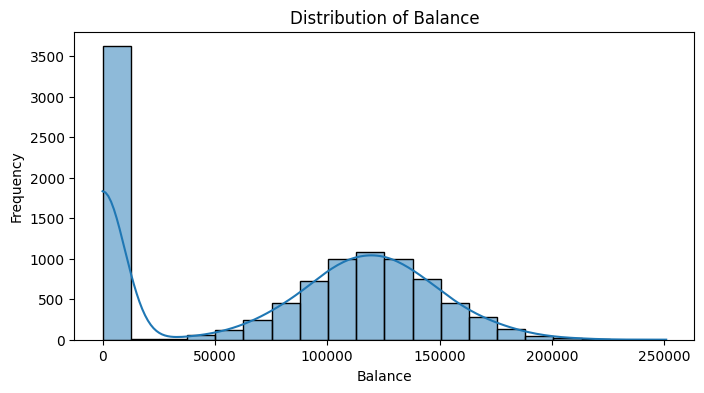

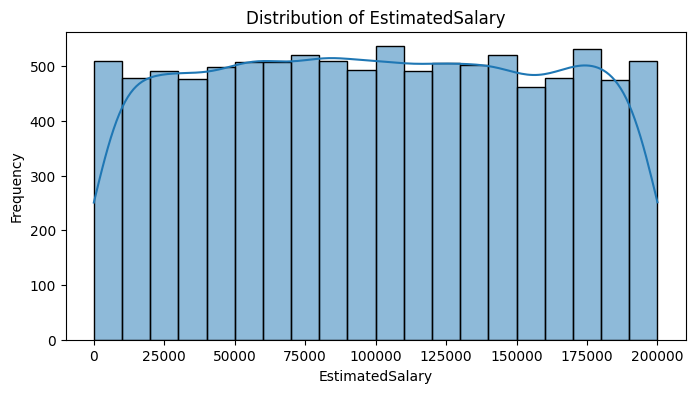

In [8]:
# Data distribution of numerical variables
numericals = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

for num in numericals:
    plt.figure(figsize=(8, 4))
    sns.histplot(bank_df[num], bins = 20, kde = True )
    plt.title(f'Distribution of {num}')
    plt.xlabel(num)
    plt.ylabel("Frequency") 

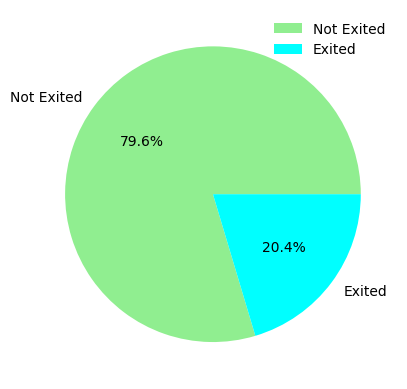

In [9]:
# Data Balance Check
value_counts = bank_df['Exited'].value_counts()

plt.pie(value_counts, labels=['Not Exited', 'Exited'], autopct='%1.1f%%', colors=['lightgreen', 'cyan'])
plt.legend(['Not Exited', 'Exited'], frameon=False)

Clearly there exists an imbalance in the data distribution

Data Prepocessing and Feature Selection

In [10]:
# Dropping useless columns
bank_df = bank_df.drop(['Surname', 'CustomerId'], axis=1)

bank_df['Gender'] = bank_df['Gender'].map({'Male': 1, 'Female': 0})
label_encoder = LabelEncoder()
bank_df['Geography'] = label_encoder.fit_transform(bank_df['Geography'])

In [11]:
# Split the data into features (X) and labels (y)
X = bank_df.drop(['Exited'], axis=1)
y = bank_df['Exited']

# Oversampling the data to balance the distribution
ros = RandomOverSampler(random_state=42)
X, y = ros.fit_resample(X, y)

# Split the Processed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model Selection and Training

In [12]:
# Statistics and Reports for further analysis and fine tuning
def modelPerformanceEvaluation(model, y_test, y_pred):
    print(f'{model}\n')
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    print('Accuracy: ', accuracy)
    print('\nConfusion Matrix:\n')
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, cmap='viridis')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()
    print('\nClassification Report:\n')
    print(class_report)

Logistic Regression

Accuracy:  0.6494036409290647

Confusion Matrix:



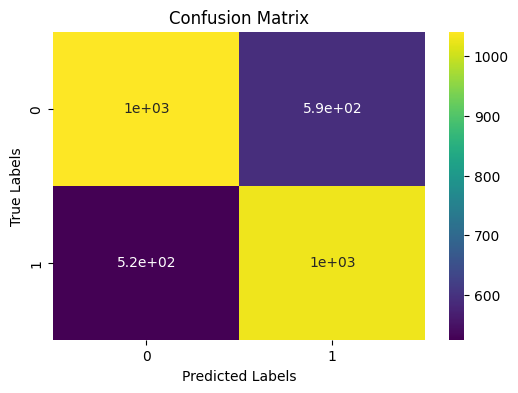


Classification Report:

              precision    recall  f1-score   support

           0       0.66      0.64      0.65      1633
           1       0.63      0.66      0.65      1553

    accuracy                           0.65      3186
   macro avg       0.65      0.65      0.65      3186
weighted avg       0.65      0.65      0.65      3186



In [13]:
# Model - Logistic Regression
Logistic_Regression = LogisticRegression()
Logistic_Regression.fit(X_train, y_train)
y_pred_lr = Logistic_Regression.predict(X_test)

modelPerformanceEvaluation('Logistic Regression', y_test, y_pred_lr)

Random Forest

Accuracy:  0.9475831763967357

Confusion Matrix:



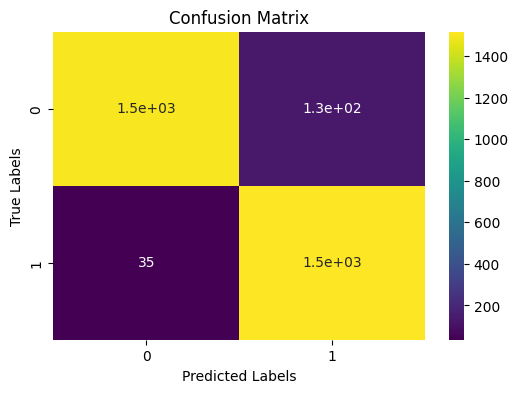


Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.92      0.95      1633
           1       0.92      0.98      0.95      1553

    accuracy                           0.95      3186
   macro avg       0.95      0.95      0.95      3186
weighted avg       0.95      0.95      0.95      3186



In [14]:
Random_Forest = RandomForestClassifier(random_state=42, n_jobs=-1)
Random_Forest.fit(X_train, y_train)
y_pred_rf = Random_Forest.predict(X_test)

modelPerformanceEvaluation('Random Forest', y_test, y_pred_rf)

Gradient Boosting

Accuracy:  0.7893910860012555

Confusion Matrix:



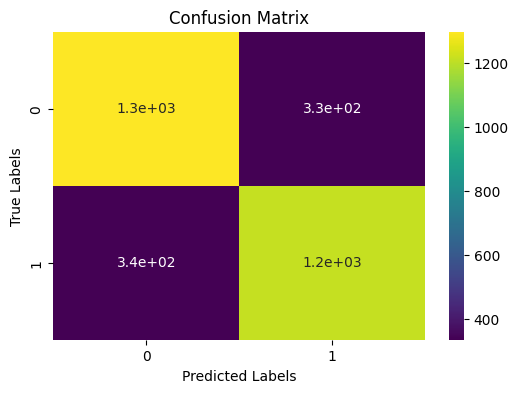


Classification Report:

              precision    recall  f1-score   support

           0       0.79      0.80      0.79      1633
           1       0.78      0.78      0.78      1553

    accuracy                           0.79      3186
   macro avg       0.79      0.79      0.79      3186
weighted avg       0.79      0.79      0.79      3186



In [15]:
Gradient_Boosting = GradientBoostingClassifier(random_state=42)
Gradient_Boosting.fit(X_train, y_train)
y_pred_gb = Gradient_Boosting.predict(X_test)

modelPerformanceEvaluation('Gradient Boosting', y_test, y_pred_gb)

From the above results produced we can conlude the efficiencies of the models are as follows,

Random Forest (94.75%) > Gradient Boosting (78.93%) > Logistic Regression (64.94%)

Random Forest Classifier produces the most efficient model among the three models for Churn prediction among Customers for Banks
Also Logistic Regression is highly inefficient for Churn prediction